<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Machine%20learning/linear_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание. Логистическая регрессия и разные виды линейной регрессии (с регуляризацией)

Задача 1: Первичный анализ данных House Prices(1 балл)

Датасет: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Требуется:

- Загрузите данные и выполните первичный анализ

- Проведите анализ распределения целевой переменной SalePrice

- Выявите и обработайте пропущенные значения в данных

In [285]:
! gdown 1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-

Downloading...
From: https://drive.google.com/uc?id=1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-
To: /content/train.csv
100% 461k/461k [00:00<00:00, 160MB/s]


In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

**Загрузите данные и выполните первичный анализ**

In [287]:
TRAIN = '/content/train.csv'
df = pd.read_csv(TRAIN, sep=',', index_col='Id')
df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [288]:
# Описание датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [289]:
# Статистические характеристики
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


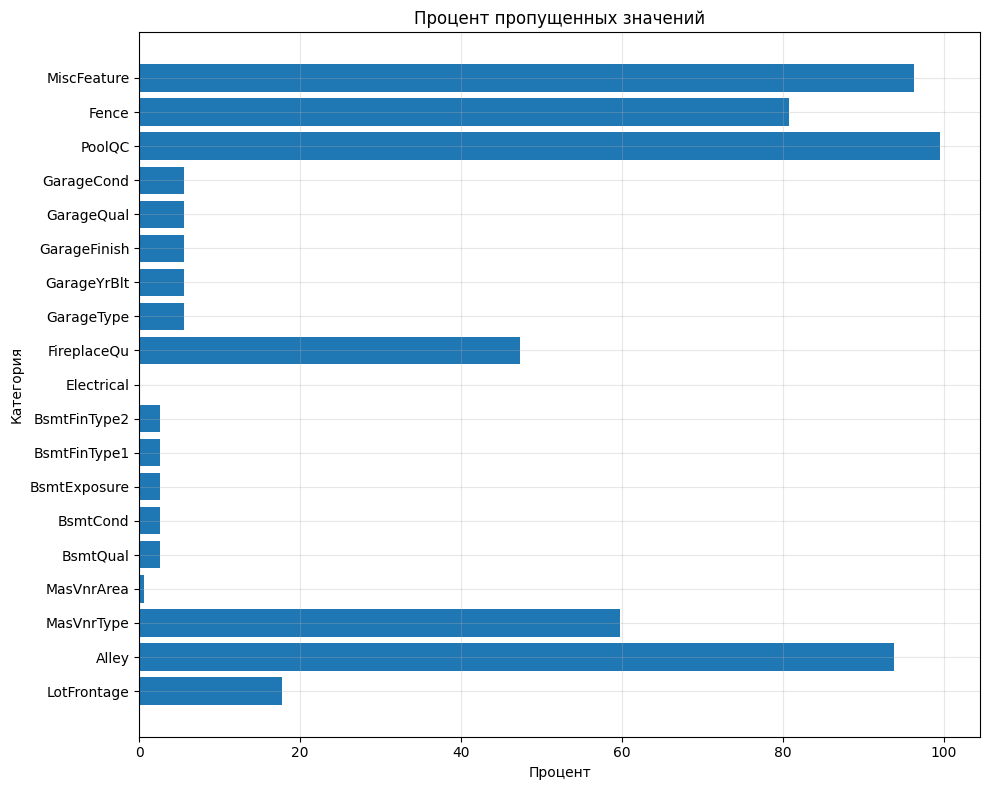

In [290]:
# Проверка на пропущенные значения
df_null_cnt = pd.DataFrame(df.isnull().sum().rename('null_sum'))
df_null_cnt = df_null_cnt[df_null_cnt['null_sum'] > 0]
df_null_cnt['null%'] = df_null_cnt['null_sum'].apply(lambda x: x/len(df) * 100)

plt.figure(figsize=(10,8))
plt.xlabel('Процент')
plt.ylabel('Категория')
plt.title('Процент пропущенных значений')
plt.barh(df_null_cnt.index, df_null_cnt['null%'])
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

**Проведите анализ распределения целевой переменной SalePrice**

In [291]:
'''
# Построим распределения фичей для лучшего понимания датасета
cols_wt_target = [col for col in df.columns if col != 'SalePrice']
num_columns = df.shape[1]
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(18, 5 * num_rows))

for i, column in enumerate(cols_wt_target):
  plt.subplot(num_rows, 3, i + 1)
  if df[column].dtype in ['int64', 'float64']:
    sns.histplot(df[column], kde=True)
  else:
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.xticks(rotation=45)
  plt.title(f'Распределение {column}')
  plt.xlabel(column)
  plt.ylabel('Частота')
  plt.grid(True, alpha=0.3)
  plt.tight_layout()


plt.show()
'''

"\n# Построим распределения фичей для лучшего понимания датасета\ncols_wt_target = [col for col in df.columns if col != 'SalePrice']\nnum_columns = df.shape[1]\nnum_rows = (num_columns + 2) // 3\n\nplt.figure(figsize=(18, 5 * num_rows))\n\nfor i, column in enumerate(cols_wt_target):\n  plt.subplot(num_rows, 3, i + 1)\n  if df[column].dtype in ['int64', 'float64']:\n    sns.histplot(df[column], kde=True)\n  else:\n    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)\n    plt.xticks(rotation=45)\n  plt.title(f'Распределение {column}')\n  plt.xlabel(column)\n  plt.ylabel('Частота')\n  plt.grid(True, alpha=0.3)\n  plt.tight_layout()\n\n\nplt.show()\n"

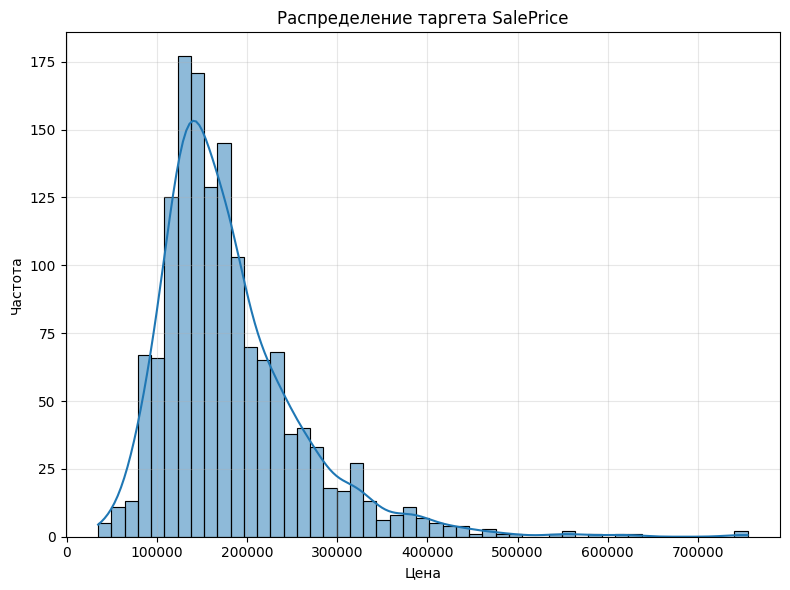

In [292]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение таргета SalePrice')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [293]:
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


По графику распределения таргета можем заметить тяжёлый хвост справа, то есть есть небольшое количество элитной недвижимости, которая смещает всё распределение - при медиане в 163 тысячи и максимальной цене дома в 755 тысяч имеем среднее значение 180 тысяч

**Выявите и обработайте пропущенные значения в данных**

In [294]:
def fill_nulls(df: pd.DataFrame, threshold:int) -> pd.DataFrame:
  '''
  Удаляем фичи в случае количества пропусков больше threshold % и низкой корреляции с таргетом
  Иначе заполняем числовые фичи медианным значением, а категориальные - модой
  '''
  df_clean = df.copy()
  df_null_count = df.isnull().sum()[df.isnull().sum() > 0].reset_index().rename(columns={'index':'feature', 0:'null_count'})
  if df_null_count.empty:
    return df_clean

  row_count = df_clean.shape[0]
  df_null_count['null%'] = df_null_count['null_count'] / row_count * 100

  high_miss = df_null_count[df_null_count['null%'] > threshold]['feature'].tolist()
  else_miss = df_null_count[df_null_count['null%'] <= threshold]['feature'].tolist()

  numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
  correlations = df_clean[numeric_cols].corr()['SalePrice'].abs().sort_values(ascending=False)
  important_cols = correlations[correlations.abs() >= 0.5].index.tolist()

  to_drop = [col for col in high_miss if col not in important_cols]
  if to_drop:
    df_clean = df_clean.drop(columns=to_drop)

  remain_cols = [col for col in high_miss if col not in to_drop] + else_miss
  if remain_cols:
    for col in remain_cols:
      if df_clean[col].dtype in ['int64', 'float64']:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
      else:
        mode_val = df_clean[col].mode()
        if mode_val.empty:
          df_clean[col] = df_clean[col].fillna('None')
        else:
          df_clean[col] = df_clean[col].fillna(mode_val.iloc[0])
  return df_clean

Видим, что после применения функции все столбцы заполнены, а так же несколько столбцов удалено

In [295]:
df = fill_nulls(df=df, threshold=20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

Задача 2: Построение базовой модели (1 балл)

Требуется:

- Разделите данные на обучающую и тестовую выборки в соотношении 80/20

- Обучите модель LinearRegression на обучающей выборке, используя только числовые признаки

- Выберите метрику для сравнения моделей и обоснуйте свой выбор
- Рассчитайте свою метрику на тестовой выборке

In [296]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

y = df['SalePrice']
X = df[numeric_cols].drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [297]:
def predict_print_score(model, name, X_test, y_test):
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f'{name} MAE -> {mae}')
  return mae

In [298]:
mae_reg = predict_print_score(
    model_reg,
    'Linear Regression',
    X_test,
    y_test
)

Linear Regression MAE -> 22975.856509153044


Обоснование выбора метрики:

В качестве метрики сравнения качества моделей была выбрана MAE, так как она хорошо интерпретируема и не очень сильно штрафует модель за выбросы - у нашего таргета тяжелый хвост

Задача 3: Предобработка данных и интерпретация модели (2 балл)

Требуется:

- Закодируйте категориальные переменные методами One-Hot Encoding или Label Encoding

- Масштабируйте числовые признаки с помощью StandardScaler

- Обучите LinearRegression на обучающих данных и оцените качество на тестовых данных по выбранной метрике

- Выведите 5 самых важных признаков по абсолютному значению коэффициентов

- Проанализируйте, какие факторы больше всего влияют на модель

Подсказка:
Зачем вообще нужен StandardScaler и One-Hot Encoding или Label Encoding ?

1) StandardScaler - для чего нужен:
- Нормализует масштаб числовых признаков (приводит к среднему=0, std=1)
- Зачем: Многие алгоритмы ML чувствительны к масштабу данных.
Пример проблемы: Признак "Площадь дома" (100-300 м²) и "Количество комнат" (1-5)без масштабирования алгоритм придаст больше веса площади, но после масштабирования - оба признака будут в одинаковом масштабе.

2) One-Hot Encoding/Label Encoding - для чего нужны:

- Label Encoding : Преобразует категории в числа. Сохраняет размерность данных, но может создать ложную порядковость (0 < 1 < 2)!

- One-Hot Encoding: Создает бинарные столбцы для каждой категории.Убирает ложную порядковость, но увеличивает размерность данных (проклятие размерности)

In [299]:
cat_cols = df.select_dtypes(include=['object']).columns

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = onehotencoder.fit_transform(df[cat_cols])
feature_names = onehotencoder.get_feature_names_out(cat_cols)
feature_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

numerical_cols_wt_target = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_wt_target.remove('SalePrice')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols_wt_target])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols_wt_target, index=df.index)

processed_df = pd.concat([feature_df, scaled_df], axis=1)

In [300]:
X = processed_df
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

model_reg_processed = LinearRegression()
model_reg_processed.fit(X_train, y_train)


LinearRegression()

In [301]:
mae_reg_processed = predict_print_score(
    model_reg_processed,
    'Processed Linear Regression',
    X_test,
    y_test
)

Processed Linear Regression MAE -> 18377.70573752116


In [302]:
print(f'Абсолютная разница между моделью с предобработанными и обычной моделью составляет -> {abs(mae_reg_processed - mae_reg)}')
# Крайне маловероятно, что модель с предобработанными данными покажет себя хуже, но подумал, что условие лишним не будет
print(f'Модель с предобработанными данными показывает себя {"лучше" if mae_reg_processed - mae_reg < 0 else "хуже"}')

Абсолютная разница между моделью с предобработанными и обычной моделью составляет -> 4598.150771631885
Модель с предобработанными данными показывает себя лучше


Выведите 5 самых важных признаков по абсолютному значению коэффициентов

In [303]:
importance_df = pd.DataFrame({
    'feature' : X.columns,
    'importance' : model_reg_processed.coef_,
    'abs_importance' : abs(model_reg_processed.coef_),
})
importance_df['effect'] = importance_df['importance'].apply(lambda x: 'positive' if x > 0 else 'negative')
importance_df.sort_values('abs_importance', ascending=False).head(5)

,feature,importance,abs_importance,effect
86,RoofMatl_ClyTile,-582944.454834,582944.454834,negative
63,Condition2_PosN,-196285.098406,196285.098406,negative
89,RoofMatl_Metal,131163.195130,131163.195130,positive
202,GarageQual_Ex,127806.309318,127806.309318,positive
207,GarageCond_Ex,-118947.549998,118947.549998,negative


Для проверки того, корректно ли модель определила влияние признаков на стоимость дома проверим, как они реально влияют на среднюю стоимость дома по всему датасету

In [304]:
def check_real_importance(df: pd.DataFrame, effect: str, first: str, second: str) -> bool:
  first_avg_price = df[df[first] == second]['SalePrice'].mean()
  overall_avg_price = df['SalePrice'].mean()
  if effect == 'negative':
      is_correct = first_avg_price < overall_avg_price
  else:
      is_correct = first_avg_price > overall_avg_price
  return True if is_correct else False

In [305]:
importance_df['validate'] = importance_df.apply(
    lambda x: check_real_importance(
        df,
        x['effect'],
        x['feature'].split('_')[0] if '_' in x['feature'] else x['feature'],
        x['feature'].split('_')[1] if '_' in x['feature'] else 'unknown'
    ), axis=1
)
importance_df.sort_values('abs_importance', ascending=False).head(5)

,feature,importance,abs_importance,effect,validate
86,RoofMatl_ClyTile,-582944.454834,582944.454834,negative,True
63,Condition2_PosN,-196285.098406,196285.098406,negative,False
89,RoofMatl_Metal,131163.195130,131163.195130,positive,False
202,GarageQual_Ex,127806.309318,127806.309318,positive,True
207,GarageCond_Ex,-118947.549998,118947.549998,negative,True


Из приведенной выше таблицы видим:

Модель неверно определила влияние вторичной отдаленности PositiveNeighborhood от дома - действительно, странно, что хороший район рядом оказывает негативное влияние на цену. Кроме того, видим, что крыша из металла так же негативно влияет на стоимость дома, хотя модель посчитала иначе

В то же время модель угадала влияние крыши из глиняной плитки, а так же фичей, связанных с гаражом на стоимость дома.

In [306]:
importance_df[importance_df['validate'] == True].sort_values('abs_importance', ascending=False).head(5)

,feature,importance,abs_importance,effect,validate
86,RoofMatl_ClyTile,-582944.454834,582944.454834,negative,True
202,GarageQual_Ex,127806.309318,127806.309318,positive,True
207,GarageCond_Ex,-118947.549998,118947.549998,negative,True
93,RoofMatl_WdShngl,97256.617566,97256.617566,positive,True
91,RoofMatl_Tar&Grv,89718.004451,89718.004451,positive,True


Видим, что реально на стоимость дома влияют вышеперечисленные параметры - материал крыши и качество гаража. Хотя то, что условия в гараже отличные понижает стоимость дома довольно странно. Возможно, таких домов мало, например - переобучение или мультиколлинеарность.

Выводы:

Итак, модель с предобработанными данными показывает себя лучше модели, обученной на сырых данных по MAE, однако она до сих пор не совсем корректно определяет влияние признаков на стоимость дома, что видно из вышенаписанных пунктов

Задача 4: Регуляризация и подбор гиперпараметров (1 балл)

Требуется:

- Создайте Pipeline с MinMaxScaler и ElasticNet, подберите оптимальные параметры (alpha, l1_ratio) с помощью GridSearchCV

- Создайте Pipeline с StandardScaler и ElasticNet, подберите оптимальные параметры (alpha, l1_ratio) с помощью GridSearchCV

- Для оценки качества используйте выбранную ранее метрику

In [315]:
cat_cols = df.select_dtypes(include=['object']).columns

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = onehotencoder.fit_transform(df[cat_cols])
feature_names = onehotencoder.get_feature_names_out(cat_cols)
feature_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

numerical_cols_wt_target = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_wt_target.remove('SalePrice')

processed_df = pd.concat([feature_df, df[numerical_cols_wt_target]], axis=1)

In [316]:
X = processed_df
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [320]:
minmax_pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', ElasticNet())])
parametersGrid = {
    "model__max_iter": [100, 500, 1000],
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "model__l1_ratio": np.arange(0.0, 1.0, 0.1)
}
grid_minmax = GridSearchCV(estimator=minmax_pipeline, param_grid=parametersGrid, scoring='neg_mean_absolute_error', cv=5)
grid_minmax.fit(X_train, y_train)
mae_minmax = predict_print_score(
    grid_minmax,
    'ElasticNet MinMaxScaler',
    X_test,
    y_test
)

standardscaler_pipeline = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet())])
grid_standard = GridSearchCV(estimator=standardscaler_pipeline, param_grid=parametersGrid, scoring='neg_mean_absolute_error', cv=5)
grid_standard.fit(X_train, y_train)
mae_standard = predict_print_score(
    grid_standard,
    'ElasticNet Standard Scaler',
    X_test,
    y_test
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.937e+11, tolerance: 5.374e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+11, tolerance: 5.720e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

ElasticNet MinMaxScaler MAE -> 20020.11092888822


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.449e+11, tolerance: 5.720e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+11, tolerance: 5.256e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

ElasticNet Standard Scaler MAE -> 17928.095946391677


Вопросы для анализа:(1 балл)

1. Сравните оптимальные параметры в двух экспериментах

2. Сравните качество модели на тестовой выборке в обоих случаях

3. Проанализируйте, какие признаки были занулены в каждом эксперименте и объясните возможные причины

4. Сделайте вывод о влиянии типа масштабирования на качество линейной регрессии

Ответ на вопрос:

Задача 5: Бинарная классификация с помощью логистической регрессии (2 балла)

Требуется:

- Создайте бинарную целевую переменную expensive (1 - если цена выше медианы, 0 - в противном случае)

- Обучите модель LogisticRegression с L2-регуляризацией

- Выполните подбор гиперпараметров с помощью GridSearchCV

- Оцените качество модели с помощью метрики F1-score

- Для лучшей модели выведите Топ-5 самых важных признаков

Примечание: Не забудьте разделить данные на обучающую и тестовую выборки перед обучением модели с тем же random_state.

Проанализируй все модели и ответе на вопросы :(2 балла)

1) Какая модель показала наилучшие результаты для регрессии и почему?

2) Как регуляризация повлияла на веса признаков?

3) Какие признаки оказались наиболее важными для предсказания цены дома?

4) Насколько хорошо логистическая регрессия справилась с бинарной классификацией?

5) Какие проблемы в данных могли повлиять на качество моделей?

Ответ на вопросы: